In [26]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [17]:
csv_in = 'cars.csv'

In [18]:
df_pop = pd.read_csv(csv_in,delimiter=',',skiprows=0,header=0)
display(df_pop.head())

,FamilyID,Have_Car
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [19]:
data = df_pop[['Have_Car']]
display(data.T)
x = data.T.values.tolist()[0]
print(x)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Have_Car,1,1,1,0,1,1,1,1,0,0,...,0,0,1,0,1,1,1,1,0,1


[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [22]:
alpha = 0.95
n = len(x)
ave = np.mean(x)
unbiased_std = np.std(x, ddof=1)
t_alpha = ss.t.ppf( (1+alpha)/2, n-1 )

lower = ave - t_alpha * unbiased_std / np.sqrt(n)
upper = ave + t_alpha * unbiased_std / np.sqrt(n)
print(lower, upper)

0.4507891524245659 0.6492108475754341


In [23]:
alpha = 0.95
ave = np.mean(x)
se = ss.sem(x)

lower, upper = ss.t.interval(alpha, loc=ave, scale=se, df=n-1)
print(lower, upper)

0.4507891524245659 0.6492108475754341


No handles with labels found to put in legend.


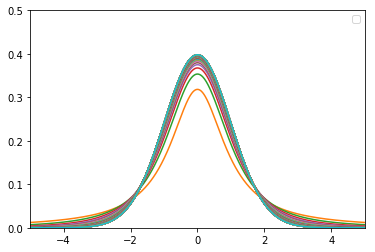

In [46]:
import scipy as sp                   
u_var = np.var(x, ddof=1)

t, p = sp.stats.ttest_1samp(x, popmean=20)

x = np.linspace(-5, 5, 1000)
fig,ax = plt.subplots(1,1)
for k in range(n):
    ax.plot(x, sp.stats.t.pdf(x, k))


plt.xlim(-5, 5)
plt.ylim(0, 0.5)
 
plt.legend()
plt.show()